In [11]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

yf.pdr_override()

pd.options.display.max_rows = 100

In [12]:
symbols = ['SPY', 
           'GOOG', 'TSLA', 'FB', 'AAPL', 'MSFT',
           'BTC-USD', 'ETH-USD', 'ADA-USD','XRP-USD', 'DOGE-USD', 
           'LTC-USD', 'XLM-USD', 'LINK-USD']

stock_data = pdr.get_data_yahoo(symbols, start="2020-01-22",
                          end="2021-11-16")['Adj Close'][symbols]
stock_data.tail(5)

[*********************100%***********************]  14 of 14 completed


,SPY,GOOG,TSLA,FB,AAPL,MSFT,BTC-USD,ETH-USD,ADA-USD,XRP-USD,DOGE-USD,LTC-USD,XLM-USD,LINK-USD
Date,,,,,,,,,,,,,,
2021-11-12,467.269989,2992.909912,1033.420044,340.890015,149.990005,336.720001,64155.941406,4667.115234,2.045766,1.189355,0.259414,251.558365,0.379479,34.265522
2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,64469.527344,4651.460449,2.053104,1.191938,0.261706,258.093201,0.378916,34.064831
2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,65466.839844,4626.358887,2.040853,1.188597,0.262912,278.007507,0.377429,33.776585
2021-11-15,467.429993,2987.760010,1013.390015,347.559998,150.000000,336.070007,63557.871094,4557.503906,2.015587,1.171371,0.256529,262.763397,0.375941,32.010754
2021-11-16,NaN,NaN,NaN,NaN,NaN,NaN,60161.246094,4216.365234,1.877235,1.090934,0.237249,230.599426,0.344057,29.225008


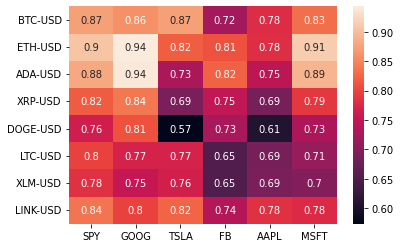

In [13]:
corr = stock_data.corr()[symbols].iloc[:6, 6:]

sns.heatmap(corr.T, annot=True)
plt.show()

<AxesSubplot:>

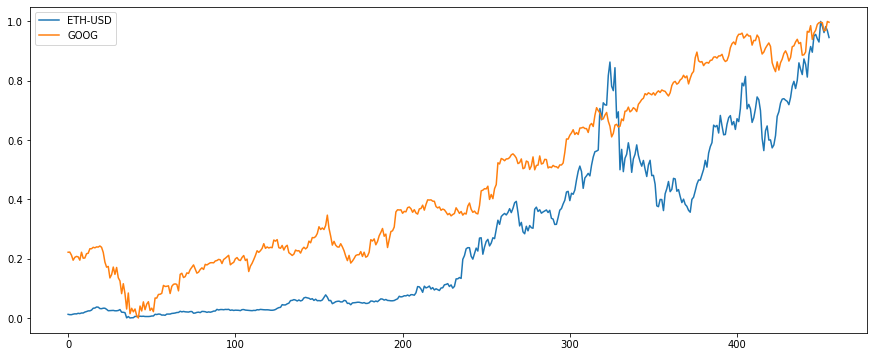

In [14]:
cleaned_data = pd.DataFrame(MinMaxScaler().fit_transform(stock_data.dropna()), columns=stock_data.columns)
cleaned_data[['ETH-USD', 'GOOG']].dropna().plot(figsize=(15, 6))

In [15]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

covid_data = df[df['location']=='United States'][['date', 'total_cases', 'new_cases', 
                'total_deaths', 'new_deaths', 'new_tests', 'total_tests',
                'positive_rate', 'total_vaccinations', 'people_vaccinated',
                'population']]
covid_data['total_cases_rate'] = covid_data['total_cases'] / covid_data['population']
covid_data['new_cases_rate'] = covid_data['new_cases'] / covid_data['population']
covid_data['total_deaths_rate'] = covid_data['total_deaths'] / covid_data['population']
covid_data.fillna(0, inplace=True)
covid_data['date'] = covid_data['date'].astype('datetime64[ns]')
covid_data.set_index('date', inplace=True)
covid_data.drop(columns=['population'], inplace=True)
covid_data.tail(5)

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,total_cases_rate,new_cases_rate,total_deaths_rate
date,,,,,,,,,,,,
2021-11-12,47007119.0,140400.0,762520.0,2483.0,733070.0,642687108.0,0.078,442106031.0,227149368.0,0.141199,0.000422,0.002290
2021-11-13,47054618.0,47499.0,762972.0,452.0,0.0,0.0,0.000,443009805.0,227545172.0,0.141341,0.000143,0.002292
2021-11-14,47079428.0,24810.0,763092.0,120.0,0.0,0.0,0.000,443281184.0,227663683.0,0.141416,0.000075,0.002292
2021-11-15,47221527.0,142099.0,764363.0,1271.0,0.0,0.0,0.000,443374199.0,227691941.0,0.141843,0.000427,0.002296
2021-11-16,47309008.0,87481.0,765811.0,1448.0,0.0,0.0,0.000,443374199.0,227691941.0,0.142105,0.000263,0.002300


In [16]:
data = stock_data.merge(covid_data, left_index=True, right_index=True, how='outer')
data.tail(5)

,SPY,GOOG,TSLA,FB,AAPL,MSFT,BTC-USD,ETH-USD,ADA-USD,XRP-USD,...,total_deaths,new_deaths,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,total_cases_rate,new_cases_rate,total_deaths_rate
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-12,467.269989,2992.909912,1033.420044,340.890015,149.990005,336.720001,64155.941406,4667.115234,2.045766,1.189355,...,762520.0,2483.0,733070.0,642687108.0,0.078,442106031.0,227149368.0,0.141199,0.000422,0.002290
2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,64469.527344,4651.460449,2.053104,1.191938,...,762972.0,452.0,0.0,0.0,0.000,443009805.0,227545172.0,0.141341,0.000143,0.002292
2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,65466.839844,4626.358887,2.040853,1.188597,...,763092.0,120.0,0.0,0.0,0.000,443281184.0,227663683.0,0.141416,0.000075,0.002292
2021-11-15,467.429993,2987.760010,1013.390015,347.559998,150.000000,336.070007,63557.871094,4557.503906,2.015587,1.171371,...,764363.0,1271.0,0.0,0.0,0.000,443374199.0,227691941.0,0.141843,0.000427,0.002296
2021-11-16,NaN,NaN,NaN,NaN,NaN,NaN,60161.246094,4216.365234,1.877235,1.090934,...,765811.0,1448.0,0.0,0.0,0.000,443374199.0,227691941.0,0.142105,0.000263,0.002300


In [7]:
data[list(data.columns)[:20]].corr().iloc[:12, 12:]

,SPY,GOOG,TSLA,FB,AAPL,MSFT,BTC-USD,ETH-USD
total_cases,0.954982,0.964069,0.905755,0.867107,0.879375,0.935042,0.928031,0.946528
new_cases,0.431036,0.374049,0.574767,0.433497,0.569474,0.426903,0.266666,0.188937
total_deaths,0.960069,0.958482,0.908218,0.894132,0.901727,0.943661,0.919895,0.929733
new_deaths,0.177067,0.137686,0.443449,0.105047,0.311032,0.197069,0.180126,0.064948
new_tests,0.617238,0.528782,0.774011,0.603433,0.759742,0.610348,0.509925,0.416885
total_tests,0.962999,0.975442,0.894870,0.892861,0.889614,0.949737,0.902831,0.947287
positive_rate,-0.119485,-0.084496,0.080948,-0.107293,0.011406,-0.037142,-0.047111,-0.072473
total_vaccinations,0.873040,0.950543,0.680515,0.834835,0.718947,0.894962,0.773377,0.937898
people_vaccinated,0.882085,0.954583,0.693718,0.838743,0.727734,0.896265,0.798101,0.943753
total_cases_rate,0.954982,0.964069,0.905755,0.867107,0.879375,0.935042,0.928031,0.946528


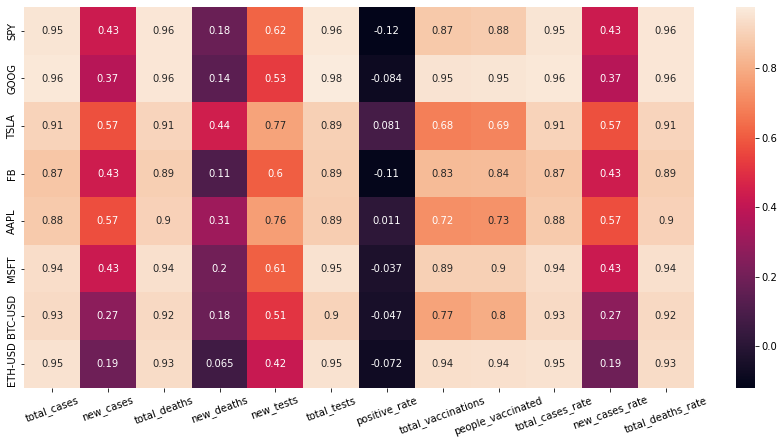

In [8]:
cryp_symbols = ['BTC-USD', 'ETH-USD','ADA-USD','XRP-USD', 'DOGE-USD', 
           'LTC-USD', 'XLM-USD', 'LINK-USD']
corr = data[list(data.columns)[:20]].corr().iloc[:12, 12:]
plt.figure(figsize=(15, 7))
sns.heatmap(corr.T, annot=True)
plt.xticks(rotation=20)
plt.show()

<AxesSubplot:>

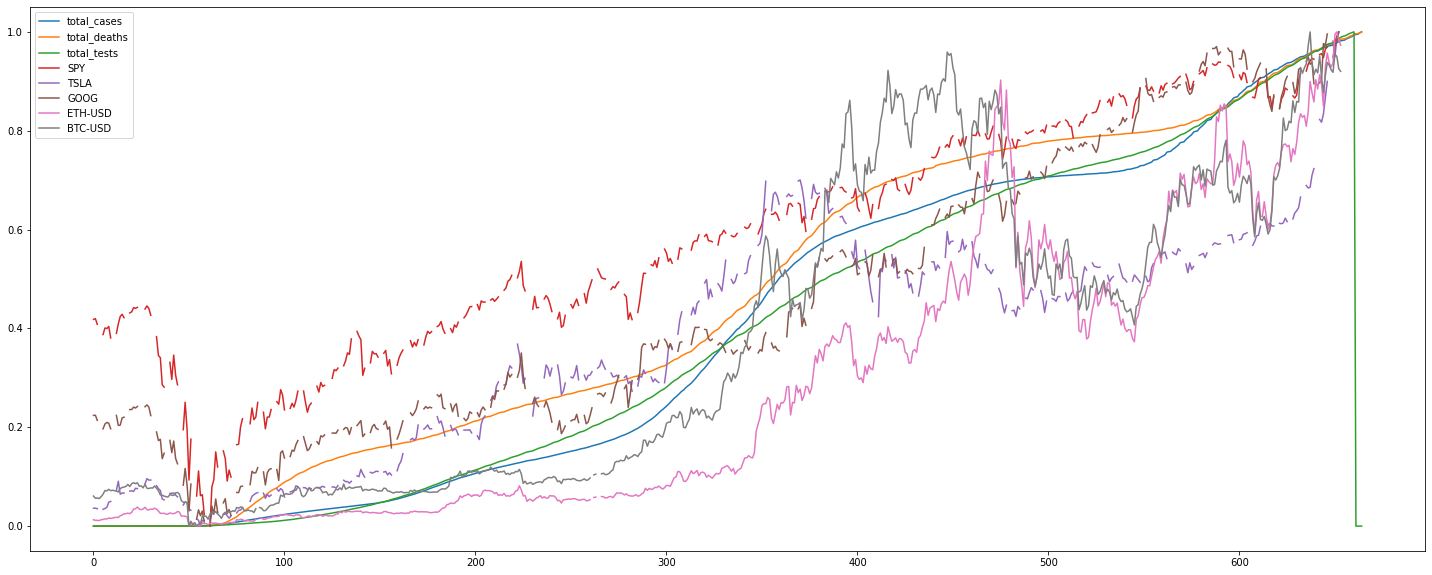

In [9]:
temp = data[['total_cases', 'total_deaths', 'total_tests', 'SPY', 'TSLA', 'GOOG', 'ETH-USD','BTC-USD']]
pd.DataFrame(MinMaxScaler().fit_transform(temp), columns=temp.columns).plot(figsize=(25, 10))

In [17]:
data.to_csv('data.csv')

In [19]:
data

,SPY,GOOG,TSLA,FB,AAPL,MSFT,BTC-USD,ETH-USD,ADA-USD,XRP-USD,...,total_deaths,new_deaths,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,total_cases_rate,new_cases_rate,total_deaths_rate
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,322.114716,1485.949951,113.912003,221.320007,78.262489,162.897568,8680.875977,168.294159,0.045654,0.236056,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,3.003769e-09,0.000000e+00,0.000000
2020-01-23,322.484192,1486.650024,114.440002,219.759995,78.639381,163.900330,8406.515625,162.928558,0.043334,0.226104,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,3.003769e-09,0.000000e+00,0.000000
2020-01-24,319.616272,1466.709961,112.963997,217.940002,78.412750,162.248703,8445.434570,163.051178,0.045004,0.223041,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,6.007538e-09,3.003769e-09,0.000000
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,8367.847656,161.283936,0.043248,0.220427,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,6.007538e-09,0.000000e+00,0.000000
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,8596.830078,168.077103,0.044581,0.230686,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.501885e-08,9.011307e-09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,467.269989,2992.909912,1033.420044,340.890015,149.990005,336.720001,64155.941406,4667.115234,2.045766,1.189355,...,762520.0,2483.0,733070.0,642687108.0,0.078,442106031.0,227149368.0,1.411985e-01,4.217292e-04,0.002290
2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,64469.527344,4651.460449,2.053104,1.191938,...,762972.0,452.0,0.0,0.0,0.000,443009805.0,227545172.0,1.413412e-01,1.426760e-04,0.002292
2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,65466.839844,4626.358887,2.040853,1.188597,...,763092.0,120.0,0.0,0.0,0.000,443281184.0,227663683.0,1.414157e-01,7.452351e-05,0.002292
